# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

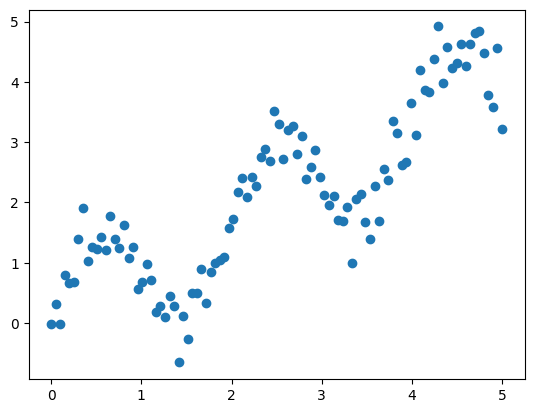

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6109761949072948


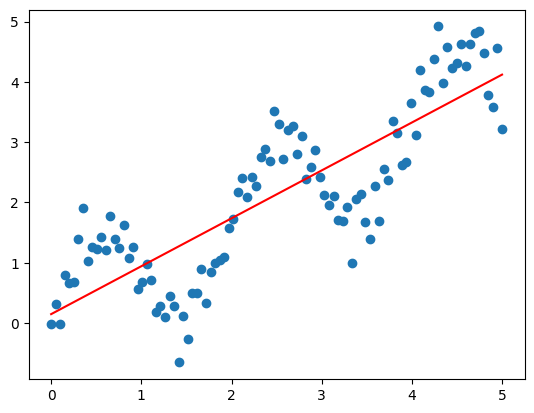

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

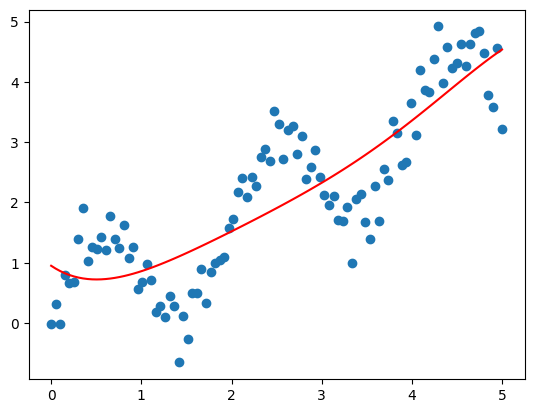

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.01025949  1.34796532 -0.52075859  0.09943539 -0.00707707]
interception:  0.9510143874851997


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.95101439, 0.90336307, 0.8621949 , 0.82713027, 0.79780459,
       0.77386792, 0.75498476, 0.74083372, 0.73110727, 0.72551147,
       0.72376564, 0.72560215, 0.73076609, 0.73901501, 0.75011864,
       0.7638586 , 0.78002813, 0.79843184, 0.81888537, 0.84121515,
       0.86525812, 0.89086145, 0.91788223, 0.94618726, 0.97565268,
       1.00616377, 1.03761463, 1.06990792, 1.10295455, 1.13667343,
       1.17099121, 1.20584193, 1.24116683, 1.27691398, 1.31303808,
       1.34950014, 1.38626721, 1.42331209, 1.46061308, 1.49815365,
       1.53592223, 1.57391186, 1.61211997, 1.65054807, 1.68920146,
       1.72808898, 1.76722273, 1.80661775, 1.8462918 , 1.88626502,
       1.92655972, 1.96720002, 2.00821166, 2.04962163, 2.09145796,
       2.13374942, 2.17652523, 2.21981478, 2.26364738, 2.30805193,
       2.35305671, 2.39868903, 2.444975  , 2.49193922, 2.53960453,
       2.58799171, 2.63711921, 2.68700286, 2.7376556 , 2.78908721,
       2.841304  , 2.89430858, 2.94809953, 3.00267115, 3.05801

In [15]:
regr_poly.predict(X_poly)

array([0.95101439, 0.90336307, 0.8621949 , 0.82713027, 0.79780459,
       0.77386792, 0.75498476, 0.74083372, 0.73110727, 0.72551147,
       0.72376564, 0.72560215, 0.73076609, 0.73901501, 0.75011864,
       0.7638586 , 0.78002813, 0.79843184, 0.81888537, 0.84121515,
       0.86525812, 0.89086145, 0.91788223, 0.94618726, 0.97565268,
       1.00616377, 1.03761463, 1.06990792, 1.10295455, 1.13667343,
       1.17099121, 1.20584193, 1.24116683, 1.27691398, 1.31303808,
       1.34950014, 1.38626721, 1.42331209, 1.46061308, 1.49815365,
       1.53592223, 1.57391186, 1.61211997, 1.65054807, 1.68920146,
       1.72808898, 1.76722273, 1.80661775, 1.8462918 , 1.88626502,
       1.92655972, 1.96720002, 2.00821166, 2.04962163, 2.09145796,
       2.13374942, 2.17652523, 2.21981478, 2.26364738, 2.30805193,
       2.35305671, 2.39868903, 2.444975  , 2.49193922, 2.53960453,
       2.58799171, 2.63711921, 2.68700286, 2.7376556 , 2.78908721,
       2.841304  , 2.89430858, 2.94809953, 3.00267115, 3.05801

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

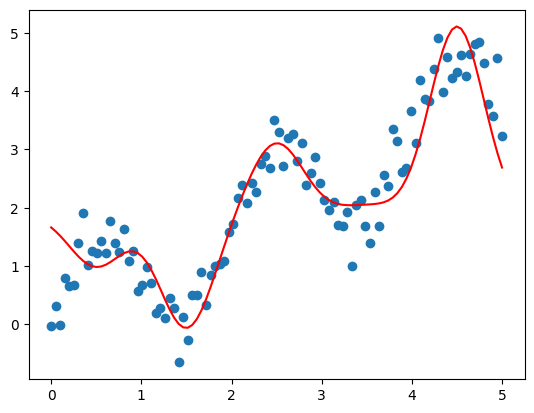

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.89420335 -1.94886551  1.22792558  0.15186707  3.22258196]
interception:  1.8862396340239793


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

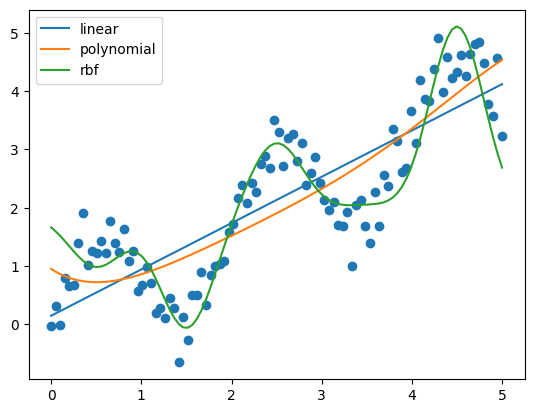

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6109761949072948


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5502725186238265


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2819067580571486
